<a href="https://colab.research.google.com/github/RaulOAlves/Wind_Turbine_Scada/blob/main/Wind_Turbine_Scada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wind Turbine Scada

Em turbinas eólicas, os sistemas Scada medem e salvam dados como velocidade do vento, direção do vento, energia gerada, etc. por intervalos de 10 minutos. Este arquivo foi retirado do sistema de scada de uma turbina eólica que está funcionando e gerando energia na Turquia. 

Os dados no arquivo são:

* Date/Time (para 10 min de intervalo)
* LV ActivePower (kW): 
 * A energia gerada pela turbina para aquele momento .
 * *The power generated by the turbine for that moment.*
* Wind Speed (m/s): 
  * A velocidade do vento na altura do cubo da turbina (a velocidade do vento que a turbina usa para geração de eletricidade).
 * *The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation).* 
* Theoretical_Power_Curve (KWh):
 * Os valores teóricos de potência que a turbina gera com a velocidade do vento que é dada pelo fabricante da turbina.
 * *The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer.*
* Wind Direction (°): 
 * A direção do vento na altura do cubo da turbina (as turbinas eólicas giram para essa direção automaticamente).
 * *The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly).*

In [25]:
!pip install windrose -q
!pip install chart_studio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 2.4 MB/s eta 0:00:00


In [26]:
# Importando as bibliotecas

# Algebra linear e Processamento dos dados
import numpy as np
import pandas as pd

# Gráficos
import seaborn as sns 
import matplotlib.pyplot as plt
from windrose import WindroseAxes

%matplotlib inline

In [41]:
# Lendo os arquivos

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/estudos_gerais/Wind_Turbine_Scada/T1.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286

In [42]:
# Renomeando as Colunas

df.rename(columns={"Date/Time": "Time",
                   "LV ActivePower (kW)":"ActivePower(kw)",
                   "Wind Speed (m/s)":"WindSpeed(m/s)",
                   "Theoretical_Power_Curve (KWh)":"TheoreticalPower(kwh)",
                   "Wind Direction (°)":"WindDirection(°)"}, 
          inplace=True)
df.head()

Time  ActivePower(kw)  WindSpeed(m/s)  TheoreticalPower(kwh)  \
0  01 01 2018 00:00       380.047791        5.311336             416.328908   
1  01 01 2018 00:10       453.769196        5.672167             519.917511   
2  01 01 2018 00:20       306.376587        5.216037             390.900016   
3  01 01 2018 00:30       419.645905        5.659674             516.127569   
4  01 01 2018 00:40       380.650696        5.577941             491.702972   

   WindDirection(°)  
0        259.994904  
1        268.641113  
2        272.564789  
3        271.258087  
4        265.674286

In [46]:
def find_month(x):
    if " 01 " in x:
        return "Jan"
    elif " 02 " in x:
        return "Feb"
    elif " 03 " in x:
        return "March"    
    elif " 04 " in x:
        return "April"    
    elif " 05 " in x:
        return "May"    
    elif " 06 " in x:
        return "June"    
    elif " 07 " in x:
        return "July"    
    elif " 08 " in x:
        return "August"    
    elif " 09 " in x:
        return "Sep"    
    elif " 10 " in x:
        return "Oct"    
    elif " 11 " in x:
        return "Nov"    
    else:
        return "Dec"

In [56]:
df['Month'] = df.Time.apply(find_month)
df

Time  ActivePower(kw)  WindSpeed(m/s)  \
0      01 01 2018 00:00       380.047791        5.311336   
1      01 01 2018 00:10       453.769196        5.672167   
2      01 01 2018 00:20       306.376587        5.216037   
3      01 01 2018 00:30       419.645905        5.659674   
4      01 01 2018 00:40       380.650696        5.577941   
...                 ...              ...             ...   
50525  31 12 2018 23:10      2963.980957       11.404030   
50526  31 12 2018 23:20      1684.353027        7.332648   
50527  31 12 2018 23:30      2201.106934        8.435358   
50528  31 12 2018 23:40      2515.694092        9.421366   
50529  31 12 2018 23:50      2820.466064        9.979332   

       TheoreticalPower(kwh)  WindDirection(°) Month  mean_WindSpeed  
0                 416.328908        259.994904   Jan             5.5  
1                 519.917511        268.641113   Jan             5.5  
2                 390.900016        272.564789   Jan             5.0  
3                 516.127569        271.258087   Jan             5.5  
4                 491.702972        265.674286   Jan             5.5  
...                      ...               ...   ...             ...  
50525            3397.190793         80.502724   Dec            11.5  
50526            1173.055771         84.062599   Dec             7.5  
50527            1788.284755         84.742500   Dec             8.5  
50528            2418.382503         84.297913   Dec             9.5  
50529            2779.184096         82.274620   Dec            10.0  

[50530 rows x 7 columns]

In [50]:
# Função para arredondar os valores da velocidade do vento em intervalos de 0.5 m/s
'''Por exemplo, se a velocidade do vento for 3.3 m/s, a função irá comparar esse valor com a lista de intervalos e 
descobrir que o intervalo ao qual ela pertence é 3.25-3.75. 
Então, a função subtrai 0.25 do valor superior do intervalo (3.75) para obter 3.5 e retorna esse valor.'''
# O valor máximo de 25.5 é referente a velocidade máxima de vento analisada anteriormente, que é 25.21

def mean_speed(x):
  list=[]
  i=0.25
  while i<=25.5:
      list.append(i)
      i+=0.5
  
  for i in list:
    if x < i:
      x=i-0.25
      return x

In [54]:
# Criando a coluna "mean_WindSpeed" e apliacndo a função mean_speed criada anteriormente

df['mean_WindSpeed']=df['WindSpeed(m/s)'].apply(mean_speed)
df

Time  ActivePower(kw)  WindSpeed(m/s)  \
0      01 01 2018 00:00       380.047791        5.311336   
1      01 01 2018 00:10       453.769196        5.672167   
2      01 01 2018 00:20       306.376587        5.216037   
3      01 01 2018 00:30       419.645905        5.659674   
4      01 01 2018 00:40       380.650696        5.577941   
...                 ...              ...             ...   
50525  31 12 2018 23:10      2963.980957       11.404030   
50526  31 12 2018 23:20      1684.353027        7.332648   
50527  31 12 2018 23:30      2201.106934        8.435358   
50528  31 12 2018 23:40      2515.694092        9.421366   
50529  31 12 2018 23:50      2820.466064        9.979332   

       TheoreticalPower(kwh)  WindDirection(°) Month  mean_WindSpeed  
0                 416.328908        259.994904   Jan             5.5  
1                 519.917511        268.641113   Jan             5.5  
2                 390.900016        272.564789   Jan             5.0  
3                 516.127569        271.258087   Jan             5.5  
4                 491.702972        265.674286   Jan             5.5  
...                      ...               ...   ...             ...  
50525            3397.190793         80.502724   Dec            11.5  
50526            1173.055771         84.062599   Dec             7.5  
50527            1788.284755         84.742500   Dec             8.5  
50528            2418.382503         84.297913   Dec             9.5  
50529            2779.184096         82.274620   Dec            10.0  

[50530 rows x 7 columns]

In [57]:
# Função para arredondar os valores da direção do vento em intervalos de 30 graus
'''Por exemplo, se a direção do vento for 259°, a função irá comparar esse valor com a lista de intervalos e 
descobrir que o intervalo ao qual ela pertence é 255-285. 
Então, a função subtrai 15 do valor superior do intervalo (285) para obter 270 e retorna esse valor.'''
# O valor máximo de 375 é referente a direção máxima de vento analisada anteriormente, que é 360°

def mean_direction(x):
  list=[]
  i=15
  while i<=375:
    list.append(i)
    i+=30

  for i in list:
    if x < i:
      x=i-15
      if x==360:
        return 0
      else:
        return x

In [58]:
# Criando a coluna "mean_direction" e apliacndo a função mean_direction criada anteriormente

df['mean_direction'] = df['WindDirection(°)'].apply(mean_direction)
df.head()

Time  ActivePower(kw)  WindSpeed(m/s)  TheoreticalPower(kwh)  \
0  01 01 2018 00:00       380.047791        5.311336             416.328908   
1  01 01 2018 00:10       453.769196        5.672167             519.917511   
2  01 01 2018 00:20       306.376587        5.216037             390.900016   
3  01 01 2018 00:30       419.645905        5.659674             516.127569   
4  01 01 2018 00:40       380.650696        5.577941             491.702972   

   WindDirection(°) Month  mean_WindSpeed  mean_direction  
0        259.994904   Jan             5.5             270  
1        268.641113   Jan             5.5             270  
2        272.564789   Jan             5.0             270  
3        271.258087   Jan             5.5             270  
4        265.674286   Jan             5.5             270

<Axes: xlabel='Wind Speed (m/s)', ylabel='LV ActivePower (kW)'>

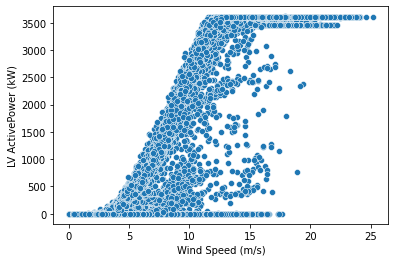

In [15]:
# Plotando os dados de potência gerada pela velocidade do vento

sns.scatterplot(data=df, x='Wind Speed (m/s)', y='LV ActivePower (kW)')

<Axes: xlabel='Wind Speed (m/s)', ylabel='Theoretical_Power_Curve (KWh)'>

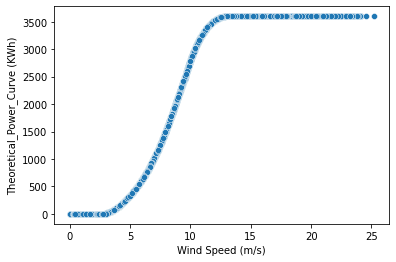

In [16]:
# Plotando os dados de potência teórica gerada pela velocidade do vento

sns.scatterplot(data=df, x='Wind Speed (m/s)', y='Theoretical_Power_Curve (KWh)')

In [19]:
pot_real = df['LV ActivePower (kW)'].tolist()
pot_teorica = df['Theoretical_Power_Curve (KWh)'].tolist()
pot_max = []
pot_min = []
limite_dentro = []

for potencia in pot_teorica:
  pot_max.append(potencia*1.05)
  pot_min.append(potencia*0.95)

for p, potencia in enumerate(pot_real):
  if potencia<=pot_max[p] and potencia>=pot_min[p]:
    limite_dentro.append('Dentro')
  elif potencia == 0:
    limite_dentro.append('Zero')
  else:
    limite_dentro.append('Fora')

print(limite_dentro.count('Dentro')/len(limite_dentro))

0.37286760340391845


In [20]:
df['DentroLimite'] = limite_dentro
df

Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0     2018-01-01 00:00:00           380.047791          5.311336   
1     2018-01-01 00:10:00           453.769196          5.672167   
2     2018-01-01 00:20:00           306.376587          5.216037   
3     2018-01-01 00:30:00           419.645905          5.659674   
4     2018-01-01 00:40:00           380.650696          5.577941   
...                   ...                  ...               ...   
50525 2018-12-31 23:10:00          2963.980957         11.404030   
50526 2018-12-31 23:20:00          1684.353027          7.332648   
50527 2018-12-31 23:30:00          2201.106934          8.435358   
50528 2018-12-31 23:40:00          2515.694092          9.421366   
50529 2018-12-31 23:50:00          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°) DentroLimite  
0                         416.328908          259.994904         Fora  
1                         519.917511          268.641113         Fora  
2                         390.900016          272.564789         Fora  
3                         516.127569          271.258087         Fora  
4                         491.702972          265.674286         Fora  
...                              ...                 ...          ...  
50525                    3397.190793           80.502724         Fora  
50526                    1173.055771           84.062599         Fora  
50527                    1788.284755           84.742500         Fora  
50528                    2418.382503           84.297913       Dentro  
50529                    2779.184096           82.274620       Dentro  

[50530 rows x 6 columns]

<Axes: xlabel='Wind Speed (m/s)', ylabel='LV ActivePower (kW)'>

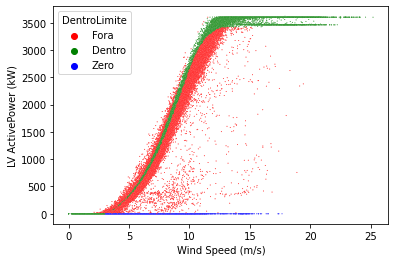

In [24]:
cores = {'Dentro':'green', 'Fora': 'red', 'Zero':'blue'}
sns.scatterplot(data=df, x='Wind Speed (m/s)', y='LV ActivePower (kW)', hue='DentroLimite', s=1, palette=cores)